In [6]:
library(dplyr)

In [7]:
iris

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "<e2><8b><ae>"): invalid factor level, NA generated

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [8]:
library(ggplot2)

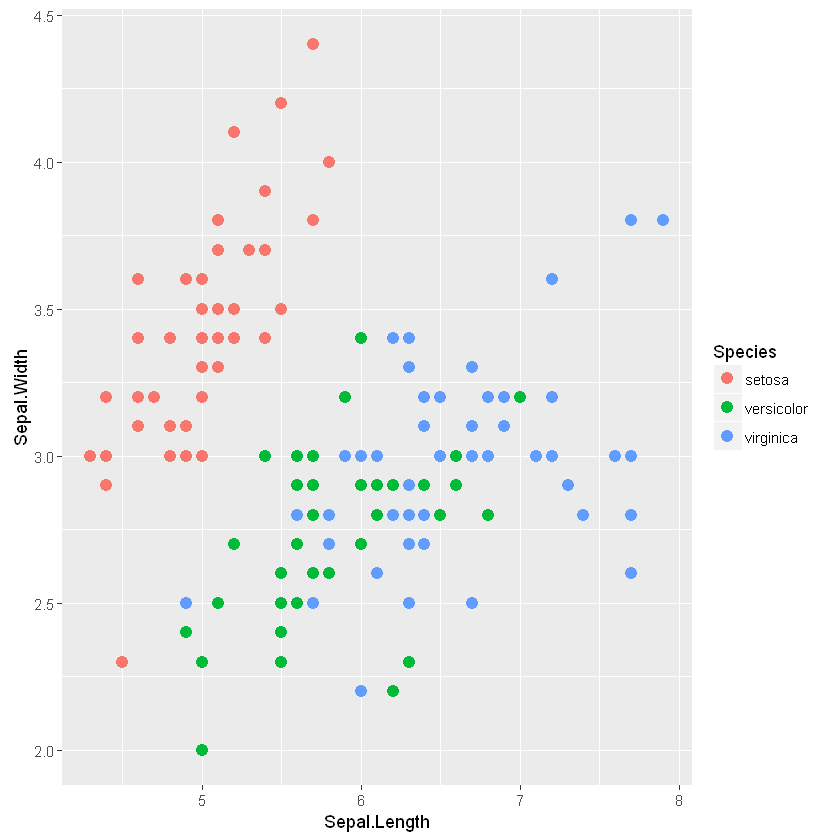

In [9]:
ggplot(data=iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point(size=3)

In [12]:
library(nnet)

In [15]:
ir <- rbind(iris3[,,1],iris3[,,2],iris3[,,3])
targets <- class.ind( c(rep("s", 50), rep("c", 50), rep("v", 50)) )
samp <- c(sample(1:50,25), sample(51:100,25), sample(101:150,25))
ir1 <- nnet(ir[samp,], targets[samp,], size = 2, rang = 0.1,
decay = 5e-4, maxit = 200)
test.cl <- function(true, pred) {
true <- max.col(true)
cres <- max.col(pred)
table(true, cres)
}
test.cl(targets[-samp,], predict(ir1, ir[-samp,]))

# weights:  19
initial  value 56.609187 
iter  10 value 36.566224
iter  20 value 19.574888
iter  30 value 17.906536
iter  40 value 8.253534
iter  50 value 2.906166
iter  60 value 1.609140
iter  70 value 1.447394
iter  80 value 1.352347
iter  90 value 1.226255
iter 100 value 1.164588
iter 110 value 1.150214
iter 120 value 1.142791
iter 130 value 1.133954
iter 140 value 1.133562
iter 150 value 1.133390
iter 160 value 1.133378
iter 170 value 1.133371
iter 180 value 1.133368
final  value 1.133368 
converged


    cres
true  1  2  3
   1 25  0  0
   2  0 25  0
   3  2  0 23

In [16]:
ird <- data.frame(rbind(iris3[,,1], iris3[,,2], iris3[,,3]),
species = factor(c(rep("s",50), rep("c", 50), rep("v", 50))))
ir.nn2 <- nnet(species ~ ., data = ird, subset = samp, size = 2, rang = 0.1,
decay = 5e-4, maxit = 200)
table(ird$species[-samp], predict(ir.nn2, ird[-samp,], type = "class"))

# weights:  19
initial  value 82.620508 
iter  10 value 35.760821
iter  20 value 9.731709
iter  30 value 5.199682
iter  40 value 4.964729
iter  50 value 4.474113
iter  60 value 4.409059
iter  70 value 4.286774
iter  80 value 4.241621
iter  90 value 4.022986
iter 100 value 2.356449
iter 110 value 1.830280
iter 120 value 1.421485
iter 130 value 1.208582
iter 140 value 1.139482
iter 150 value 1.057155
iter 160 value 1.041733
iter 170 value 1.028230
iter 180 value 1.021985
iter 190 value 1.019619
iter 200 value 1.019013
final  value 1.019013 
stopped after 200 iterations


   
     c  s  v
  c 25  0  0
  s  0 25  0
  v  2  0 23

In [17]:
# use half the iris data
ir <- rbind(iris3[,,1], iris3[,,2], iris3[,,3])
targets <- matrix(c(rep(c(1,0,0),50), rep(c(0,1,0),50), rep(c(0,0,1),50)),
150, 3, byrow=TRUE)
samp <- c(sample(1:50,25), sample(51:100,25), sample(101:150,25))
ir1 <- nnet(ir[samp,], targets[samp,], size=2, rang=0.1, decay=5e-4, maxit=200)
eigen(nnetHess(ir1, ir[samp,], targets[samp,]), TRUE)$values

# weights:  19
initial  value 57.167362 
iter  10 value 50.007215
iter  20 value 29.624684
iter  30 value 21.615991
iter  40 value 18.500612
iter  50 value 11.298185
iter  60 value 3.728685
iter  70 value 2.848584
iter  80 value 2.614220
iter  90 value 2.334847
iter 100 value 2.268862
iter 110 value 2.249119
iter 120 value 2.241811
iter 130 value 2.239429
iter 140 value 2.238891
final  value 2.238827 
converged


[1] 9.098325e+02 2.260114e+00 6.781666e-01 3.829931e-01 3.051816e-01
 [6] 7.358081e-02 6.727360e-02 5.155664e-02 1.024481e-02 8.807841e-03
[11] 5.722866e-03 4.420767e-03 3.641867e-03 3.451482e-03 2.095649e-03
[16] 1.355777e-03 1.070614e-03 1.030037e-03 9.355708e-04